In [32]:
# Next question, how do jobs and skills pay for data analysts

#We want to 
#1. Evaluate median salary for top 6 data jobs
#2. Find the median salary per skill for Data Analysts
#3. Visualise for highest paying skills and most demanded skills

In [33]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import PercentFormatter

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)

In [34]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])

In [35]:
job_titles = df_US['job_title_short'].value_counts().index[:5].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer']

In [37]:
df_US_top5 = df_US[df_US['job_title_short'].isin(job_titles)]

job_order = df_US_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

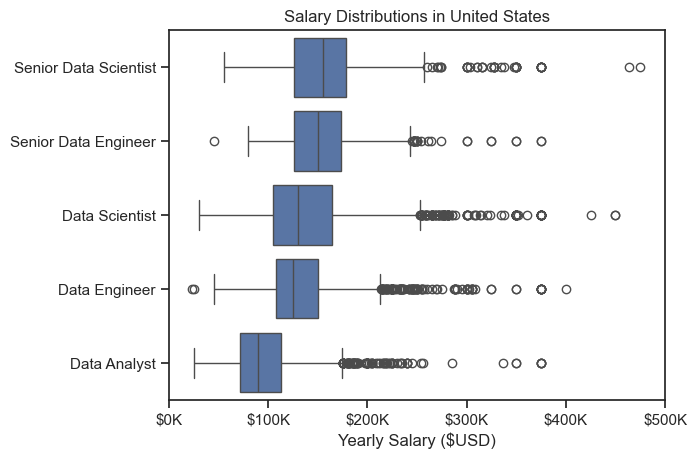

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Calculate median salary for each job title and sort in descending order
job_order = df_US_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.boxplot(data=df_US_top5, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 500000)

# Format the x-axis to show values in the form of '$00K'
ticks_x = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()


In [ ]:
# Count the number of jobs for each role
job_counts = df_AUS_top5['job_title_short'].value_counts()

# Print the number of jobs for each role
print("Number of jobs for each role:")
print(job_counts)

Number of jobs for each role:
job_title_short
Data Engineer                30
Senior Data Engineer          9
Data Scientist                7
Machine Learning Engineer     7
Software Engineer             6
Name: count, dtype: int64


In [39]:
# Count the number of jobs for each role
job_counts = df_US_top5['job_title_short'].value_counts()

# Print the number of jobs for each role
print("Number of jobs for each role:")
print(job_counts)

Number of jobs for each role:
job_title_short
Data Scientist           4553
Data Analyst             4350
Data Engineer            2915
Senior Data Scientist    1241
Senior Data Engineer     1058
Name: count, dtype: int64


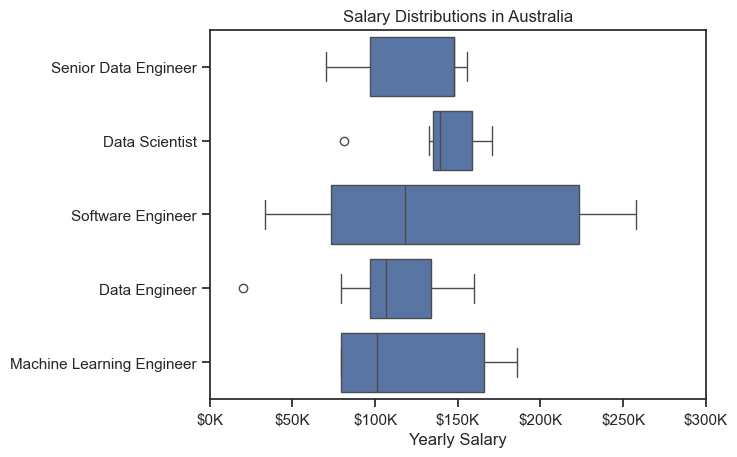

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Assuming df_AUS_top5 is already defined
# Calculate median salary for each job title and sort in descending order
median_salary = df_AUS_top5.groupby('job_title_short', observed=True)['salary_year_avg'].median().sort_values(ascending=False)

# Reorder the job titles based on the sorted median salary
df_AUS_top5 = df_AUS_top5.copy()  # Avoiding SettingWithCopyWarning
df_AUS_top5['job_title_short'] = pd.Categorical(df_AUS_top5['job_title_short'], categories=median_salary.index, ordered=True)

# Sort the DataFrame based on the ordered categories
df_AUS_top5 = df_AUS_top5.sort_values(by='job_title_short')

sns.boxplot(data=df_AUS_top5, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary Distributions in Australia')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 300000)

# Format the x-axis to show values in the form of '$00K'
ticks_x = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()


In [46]:
#Investigating median salary versus skill for data analysts

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [55]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [59]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by = 'median', ascending=False) #want to sort by median now that we have top 10 popular skills

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


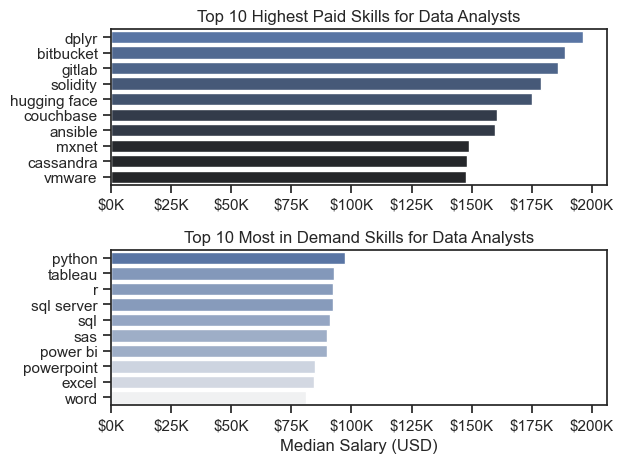

In [60]:
#Now we have the two dataframes, we need to plot them

fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax=ax[0], hue = 'median', palette = 'dark:b')
ax[0].legend().remove()

#df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)

#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))


sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax=ax[1], hue = 'median', palette = 'light:b') #seaborn allows you to change colours base on variable - median
#df_DA_top_skills.plot(kind = 'barh', y = 'median', ax = ax[1],legend = False)
ax[1].legend().remove()

#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) # or ax[1].set_xlim(0, 200000) 
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()